## SF crime data analysis and modeling

In [2]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ggplot import *
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [3]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location PdId SF Find Neighborhoods Current Police Districts Current Supervisor Districts Analysis Neighborhoods :@computed_region_yftq_j783 :@computed_region_p5aj_wyqh :@computed_region_rxqg_mtj9 :@computed_region_bh8s_q3mv :@computed_region_fyvs_ahh9 :@computed_region_9dfj_4gjx :@computed_region_n4xg_c4py :@computed_region_4isq_27mq :@computed_region_fcz8_est8 :@computed_region_pigm_ib2e :@computed_region_9jxd_iqea :@computed_region_6pnf_4xz7 :@computed_region_6ezc_tdp2 :@computed_region_h4ep_8xdi :@computed_region_nqbw_i6c3 :@computed_region_2dwj_jsy4 180362289 VEHICLE THEFT STOLEN MOTORCYCLE Tuesday 05/15/2018 10:30 SOUTHERN NONE 700 Block of TEHAMA ST -122.41191202732877 37.77520656149669 (37.77520656149669, -122.41191202732877) 18036228907023 32 1 10 34 8 2 9 28853 34 null 1 null 1 null null 2 null null 1 null 180360948 NON-CRIMINAL AIDED CASE, MENTAL DISTURBED Tuesday 05/15/2018 04:14 SOUTHERN NONE MARKET ST / SOUTH VAN NESS AV -122.41925789481357 37.77514629165388 (37.77514629165388, -122.41925789481357) 18036094864020 32 1 10 20 8 2 9 28853 19 null 1 null 1 null 8 2 1 1 1 null 180360879 OTHER OFFENSES PAROLE VIOLATION Tuesday 05/15/2018 02:01 MISSION ARREST, BOOKED CAPP ST / 21ST ST -122.41781255878655 37.757100579642824 (37.757100579642824, -122.41781255878655) 18036087926150 53 3 2 20 2 4 7 28859 19 13 null 15 3 15 null 2 null null 3 null 180360879 OTHER OFFENSES TRAFFIC VIOLATION ARREST Tuesday 05/15/2018 02:01 MISSION ARREST, BOOKED CAPP ST / 21ST ST -122.41781255878655 37.757100579642824 (37.757100579642824, -122.41781255878655) 18036087965010 53 3 2 20 2 4 7 28859 19 13 null 15 3 15 null 2 null null 3 null 180360879 OTHER OFFENSES TRAFFIC VIOLATION Tuesday 05/15/2018 02:01 MISSION ARREST, BOOKED CAPP ST / 21ST ST -122.41781255878655 37.757100579642824 (37.757100579642824, -122.41781255878655) 18036087965015 53 3 2 20 2 4 7 28859 19 13 null 15 3 15 null 2 null null 3 null 180360829 OTHER OFFENSES DRIVERS LICENSE, SUSPENDED OR REVOKED Tuesday 05/15/2018 01:27 MISSION NONE 700 Block of SHOTWELL ST -122.41561725232026 37.75641376904809 (37.75641376904809, -122.41561725232026) 18036082965016 53 3 2 20 2 4 7 28859 19 null null null 3 null null 2 null null 3 null 180360835 ROBBERY ROBBERY, BODILY FORCE Tuesday 05/15/2018 01:25 SOUTHERN ARREST, BOOKED 0 Block of 6TH ST -122.41004163181597 37.781953653725715 (37.781953653725715, -122.41004163181597) 18036083503074 32 5 10 34 14 2 9 28853 34 17 1 18 1 18 7 2 1 1 1 null 180360835 DRUG/NARCOTIC POSSESSION OF NARCOTICS PARAPHERNALIA Tuesday 05/15/2018 01:25 SOUTHERN ARREST, BOOKED 0 Block of 6TH ST -122.41004163181597 37.781953653725715 (37.781953653725715, -122.41004163181597) 18036083516710 32 5 10 34 14 2 9 28853 34 17 1 18 1 18 7 2 1 1 1 null 180360794 LIQUOR LAWS MISCELLANEOUS LIQOUR LAW VIOLATION Tuesday 05/15/2018 00:19 PARK ARREST, BOOKED 1500 Block of HAIGHT ST -122.44776112231955 37.76984648754153 (37.76984648754153, -122.44776112231955) 18036079417030 25 7 11 3 15 5 11 29492 9 22 null 24 null 25 null 1 null null null null 180360794 WARRANTS ENROUTE TO OUTSIDE JURISDICTION Tuesday 05/15/2018 00:19 PARK ARREST, BOOKED 1500 Block of HAIGHT ST -122.44776112231955 37.76984648754153 (37.76984648754153, -122.44776112231955) 18036079462050 25 7 11 3 15 5 11 29492 9 22 null 24 null 25 null 1 null null null null 180360788 PROSTITUTION LOITERING FOR PURPOSE OF PROSTITUTION Monday 05/14/2018 23:43 MISSION NONE 20TH ST / CAPP ST -122.41796448376013 37.75869681664891 (37.75869681664891, -122.41796448376013) 18036078813075 53 3 2 20 2 4 7 28859 19 13 null 15 3 15 null 2 null null 3 null 180360788 OTHER OFFENSES RESISTING ARREST Monday 05/14/2018 23:43 MISSION NONE 20TH ST / CAPP ST -122.41796448376013 37.75869681664891 (37.75869681664891, -122.41796448376013) 18036078827170 53 3 2 20 2 4 7 28859 19 13 null 15 3 15 null 2 null null 3 null 180360603 ROBBERY ROBBERY, BODILY FORCE Monday 05/14/2018 21

#### OLAP: 
#####Write a Spark program that counts the number of crimes for different category.

Below are some example codes to demonstrate the way to use Spark RDD, DF, and SQL to work with big data.

In [6]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category count LARCENY/THEFT 480448 OTHER OFFENSES 309358 NON-CRIMINAL 238323 ASSAULT 194694 VEHICLE THEFT 126602 DRUG/NARCOTIC 119628 VANDALISM 116059 WARRANTS 101379 BURGLARY 91543 SUSPICIOUS OCC 80444 MISSING PERSON 64961 ROBBERY 55867 FRAUD 41542 SECONDARY CODES 25831 FORGERY/COUNTERFEITING 23050 WEAPON LAWS 22234 TRESPASS 19449 PROSTITUTION 16701 STOLEN PROPERTY 11891 SEX OFFENSES, FORCIBLE 11742 DISORDERLY CONDUCT 10040 DRUNKENNESS 9826 RECOVERED VEHICLE 8716 DRIVING UNDER THE INFLUENCE 5672 KIDNAPPING 5346 RUNAWAY 4440 LIQUOR LAWS 4083 ARSON 3931 EMBEZZLEMENT 2988 LOITERING 2430 SUICIDE 1292 FAMILY OFFENSES 1183 BAD CHECKS 925 BRIBERY 813 EXTORTION 741 SEX OFFENSES, NON FORCIBLE 431 GAMBLING 348 PORNOGRAPHY/OBSCENE MAT 59 TREA 14

In [7]:
#Spark SQL based
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category Count LARCENY/THEFT 480448 OTHER OFFENSES 309358 NON-CRIMINAL 238323 ASSAULT 194694 VEHICLE THEFT 126602 DRUG/NARCOTIC 119628 VANDALISM 116059 WARRANTS 101379 BURGLARY 91543 SUSPICIOUS OCC 80444 MISSING PERSON 64961 ROBBERY 55867 FRAUD 41542 SECONDARY CODES 25831 FORGERY/COUNTERFEITING 23050 WEAPON LAWS 22234 TRESPASS 19449 PROSTITUTION 16701 STOLEN PROPERTY 11891 SEX OFFENSES, FORCIBLE 11742 DISORDERLY CONDUCT 10040 DRUNKENNESS 9826 RECOVERED VEHICLE 8716 DRIVING UNDER THE INFLUENCE 5672 KIDNAPPING 5346 RUNAWAY 4440 LIQUOR LAWS 4083 ARSON 3931 EMBEZZLEMENT 2988 LOITERING 2430 SUICIDE 1292 FAMILY OFFENSES 1183 BAD CHECKS 925 BRIBERY 813 EXTORTION 741 SEX OFFENSES, NON FORCIBLE 431 GAMBLING 348 PORNOGRAPHY/OBSCENE MAT 59 TREA 14

#### OLAP
Counts the number of crimes for different district, and visualize your results

In [9]:
#Dataframe based solution
q2_res = df_opt1.groupBy('pddistrict').count().orderBy('count', ascending=False)
display(q2_res)

pddistrict count SOUTHERN 399785 MISSION 300076 NORTHERN 272713 CENTRAL 226255 BAYVIEW 221000 INGLESIDE 194180 TENDERLOIN 191746 TARAVAL 166971 PARK 125479 RICHMOND 116818 null 1

In [10]:
#Spark SQL based
q2_sql = spark.sql("""
                      SELECT pddistrict, COUNT(*) AS Count 
                      FROM sf_crime 
                      GROUP BY pddistrict 
                      ORDER BY Count DESC
                   """)
display(q2_sql)

pddistrict Count SOUTHERN 399785 MISSION 300076 NORTHERN 272713 CENTRAL 226255 BAYVIEW 221000 INGLESIDE 194180 TENDERLOIN 191746 TARAVAL 166971 PARK 125479 RICHMOND 116818 null 1

#### OLAP
Count the number of crimes each "Sunday" at "SF downtown".   
hints: SF downtown is defiend  via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

In [12]:
# Drop useless columns
df = df_opt1.select('IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId', 'SF Find Neighborhoods', 'Current Police Districts', 'Current Supervisor Districts', 'Analysis Neighborhoods')
# Convert column types
df = df.withColumn('X', df_opt1['X'].cast('float')).withColumn('Y', df_opt1['Y'].cast('float'))
df = df.withColumn('Date', to_date(df['Date'], format='MM/dd/yyyy'))
df.createOrReplaceTempView("sf")

display(df.head(5))

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location PdId SF Find Neighborhoods Current Police Districts Current Supervisor Districts Analysis Neighborhoods 180362289 VEHICLE THEFT STOLEN MOTORCYCLE Tuesday 2018-05-15 10:30 SOUTHERN NONE 700 Block of TEHAMA ST -122.41191101074219 37.77520751953125 (37.77520656149669, -122.41191202732877) 18036228907023 32 1 10 34 180360948 NON-CRIMINAL AIDED CASE, MENTAL DISTURBED Tuesday 2018-05-15 04:14 SOUTHERN NONE MARKET ST / SOUTH VAN NESS AV -122.41925811767578 37.775146484375 (37.77514629165388, -122.41925789481357) 18036094864020 32 1 10 20 180360879 OTHER OFFENSES PAROLE VIOLATION Tuesday 2018-05-15 02:01 MISSION ARREST, BOOKED CAPP ST / 21ST ST -122.41781616210938 37.75709915161133 (37.757100579642824, -122.41781255878655) 18036087926150 53 3 2 20 180360879 OTHER OFFENSES TRAFFIC VIOLATION ARREST Tuesday 2018-05-15 02:01 MISSION ARREST, BOOKED CAPP ST / 21ST ST -122.41781616210938 37.75709915161133 (37.757100579642824, -122.41781255878655) 18036087965010 53 3 2 20 180360879 OTHER OFFENSES TRAFFIC VIOLATION Tuesday 2018-05-15 02:01 MISSION ARREST, BOOKED CAPP ST / 21ST ST -122.41781616210938 37.75709915161133 (37.757100579642824, -122.41781255878655) 18036087965015 53 3 2 20

In [13]:
def get_line(x1,y1,x2,y2):
    k = (y1-y2)/(x1-x2)
    b = y1 - k * x1
    return k,b

def get_SF_borders(x,y):
  
    x1,y1 = (37.797838,-122.406922)
    x2,y2 = (37.786670,-122.404696)
    x3,y3 = (37.798880,-122.398100)
    x4,y4 = (37.793166,-122.396509)

    k1,b1 = get_line(x1,y1,x2,y2)
    k2,b2 = get_line(x3,y3,x4,y4)
    k3,b3 = get_line(x1,y1,x3,y3)
    k4,b4 = get_line(x2,y2,x4,y4)
  
    return y > k1*x+b1 and y < k2*x+b2 and y > k3*x+b3 and y < k4*x+b4

get_SF_borders_udf = udf(get_SF_borders, BooleanType())

In [14]:
#Dataframe based solution
q3_res = df.filter(get_SF_borders_udf(df['Y'],df['X'])) \
           .filter(df.DayOfWeek == 'Sunday') \
           .groupBy('Date','DayOfWeek').count().orderBy('Date', ascending = False)
display(q3_res)

Date DayOfWeek count 2018-05-13 Sunday 3 2018-05-06 Sunday 6 2018-04-29 Sunday 3 2018-04-22 Sunday 4 2018-04-15 Sunday 5 2018-04-08 Sunday 10 2018-04-01 Sunday 4 2018-03-25 Sunday 7 2018-03-18 Sunday 7 2018-03-11 Sunday 3 2018-02-25 Sunday 7 2018-02-18 Sunday 8 2018-02-11 Sunday 3 2018-02-04 Sunday 11 2018-01-28 Sunday 9 2018-01-21 Sunday 3 2018-01-14 Sunday 7 2018-01-07 Sunday 11 2017-12-31 Sunday 8 2017-12-24 Sunday 1 2017-12-17 Sunday 15 2017-12-10 Sunday 5 2017-12-03 Sunday 8 2017-11-26 Sunday 4 2017-11-19 Sunday 7 2017-11-12 Sunday 2 2017-11-05 Sunday 9 2017-10-29 Sunday 6 2017-10-22 Sunday 4 2017-10-15 Sunday 8 2017-10-08 Sunday 2 2017-10-01 Sunday 11 2017-09-24 Sunday 4 2017-09-17 Sunday 5 2017-09-10 Sunday 9 2017-09-03 Sunday 11 2017-08-27 Sunday 4 2017-08-20 Sunday 9 2017-08-13 Sunday 6 2017-08-06 Sunday 5 2017-07-30 Sunday 10 2017-07-23 Sunday 12 2017-07-16 Sunday 8 2017-07-09 Sunday 2 2017-07-02 Sunday 1 2017-06-25 Sunday 7 2017-06-18 Sunday 6 2017-06-11 Sunday 6 2017-06-04 Sunday 9 2017-05-28 Sunday 5 2017-05-21 Sunday 6 2017-05-14 Sunday 4 2017-05-07 Sunday 8 2017-04-30 Sunday 6 2017-04-23 Sunday 7 2017-04-16 Sunday 8 2017-04-09 Sunday 5 2017-04-02 Sunday 2 2017-03-26 Sunday 7 2017-03-19 Sunday 3 2017-03-12 Sunday 12 2017-03-05 Sunday 8 2017-02-26 Sunday 8 2017-02-19 Sunday 8 2017-02-12 Sunday 2 2017-02-05 Sunday 9 2017-01-29 Sunday 6 2017-01-22 Sunday 7 2017-01-15 Sunday 8 2017-01-08 Sunday 9 2017-01-01 Sunday 8 2016-12-25 Sunday 4 2016-12-18 Sunday 9 2016-12-11 Sunday 13 2016-12-04 Sunday 14 2016-11-27 Sunday 5 2016-11-20 Sunday 4 2016-11-13 Sunday 11 2016-11-06 Sunday 9 2016-10-30 Sunday 14 2016-10-23 Sunday 5 2016-10-16 Sunday 7 2016-10-09 Sunday 9 2016-10-02 Sunday 4 2016-09-25 Sunday 9 2016-09-18 Sunday 9 2016-09-11 Sunday 6 2016-09-04 Sunday 8 2016-08-28 Sunday 9 2016-08-21 Sunday 8 2016-08-14 Sunday 7 2016-08-07 Sunday 7 2016-07-31 Sunday 15 2016-07-24 Sunday 9 2016-07-17 Sunday 5 2016-07-10 Sunday 4 2016-07-03 Sunday 10 2016-06-26 Sunday 8 2016-06-19 Sunday 7 2016-06-12 Sunday 9 2016-06-05 Sunday 6 2016-05-29 Sunday 10 2016-05-22 Sunday 1 2016-05-15 Sunday 14 2016-05-08 Sunday 6 2016-05-01 Sunday 5 2016-04-24 Sunday 3 2016-04-17 Sunday 4 2016-04-10 Sunday 2 2016-04-03 Sunday 7 2016-03-27 Sunday 3 2016-03-20 Sunday 7 2016-03-13 Sunday 3 2016-03-06 Sunday 6 2016-02-28 Sunday 5 2016-02-21 Sunday 4 2016-02-14 Sunday 6 2016-02-07 Sunday 6 2016-01-31 Sunday 11 2016-01-24 Sunday 6 2016-01-17 Sunday 5 2016-01-10 Sunday 8 2016-01-03 Sunday 1 2015-12-27 Sunday 9 2015-12-20 Sunday 2 2015-12-13 Sunday 12 2015-12-06 Sunday 6 2015-11-29 Sunday 8 2015-11-22 Sunday 5 2015-11-15 Sunday 8 2015-11-08 Sunday 7 2015-11-01 Sunday 12 2015-10-25 Sunday 10 2015-10-18 Sunday 17 2015-10-11 Sunday 4 2015-10-04 Sunday 8 2015-09-27 Sunday 4 2015-09-20 Sunday 8 2015-09-13 Sunday 6 2015-09-06 Sunday 4 2015-08-30 Sunday 7 2015-08-23 Sunday 4 2015-08-16 Sunday 8 2015-08-09 Sunday 9 2015-08-02 Sunday 7 2015-07-26 Sunday 11 2015-07-19 Sunday 7 2015-07-12 Sunday 5 2015-07-05 Sunday 8 2015-06-28 Sunday 8 2015-06-21 Sunday 8 2015-06-14 Sunday 11 2015-06-07 Sunday 11 2015-05-31 Sunday 6 2015-05-24 Sunday 7 2015-05-17 Sunday 8 2015-05-10 Sunday 7 2015-05-03 Sunday 6 2015-04-26 Sunday 10 2015-04-19 Sunday 7 2015-04-12 Sunday 13 2015-04-05 Sunday 5 2015-03-29 Sunday 6 2015-03-22 Sunday 7 2015-03-15 Sunday 5 2015-03-08 Sunday 7 2015-03-01 Sunday 10 2015-02-22 Sunday 11 2015-02-15 Sunday 3 2015-02-08 Sunday 5 2015-02-01 Sunday 7 2015-01-25 Sunday 13 2015-01-18 Sunday 9 2015-01-11 Sunday 7 2015-01-04 Sunday 13 2014-12-28 Sunday 7 2014-12-21 Sunday 11 2014-12-14 Sunday 4 2014-12-07 Sunday 7 2014-11-30 Sunday 4 2014-11-23 Sunday 11 2014-11-16 Sunday 6 2014-11-09 Sunday 2 2014-11-02 Sunday 8 2014-10-26 Sunday 9 2014-10-19 Sunday 17 2014-10-12 Sunday 9 2014-10-05 Sunday 8 2014-09-28 Sunday 6 2014-09-21 Sunday 9 2014-09-14 Sunday 10 2014-09-07 Sunday 7 2014-08-31 Sunday 9 2014-08-24 Sunday 9 2014-08-17 Sunday 5 2014-08-10 Sunday 8 2014-08-03 Sunday 15 201

In [15]:
#Spark SQL based
spark.udf.register("get_SF_borders_sql", get_SF_borders, BooleanType())
q3_sql = spark.sql(""" 
                      select 
                        date, 
                        dayofweek, 
                        count(*) as Count 
                      from sf 
                      where dayofweek = 'Sunday' 
                      and get_SF_borders_sql(Y,X) 
                      group by date, dayofweek 
                      order by date desc
                   """)
display(q3_sql)

date dayofweek Count 2018-05-13 Sunday 3 2018-05-06 Sunday 6 2018-04-29 Sunday 3 2018-04-22 Sunday 4 2018-04-15 Sunday 5 2018-04-08 Sunday 10 2018-04-01 Sunday 4 2018-03-25 Sunday 7 2018-03-18 Sunday 7 2018-03-11 Sunday 3 2018-02-25 Sunday 7 2018-02-18 Sunday 8 2018-02-11 Sunday 3 2018-02-04 Sunday 11 2018-01-28 Sunday 9 2018-01-21 Sunday 3 2018-01-14 Sunday 7 2018-01-07 Sunday 11 2017-12-31 Sunday 8 2017-12-24 Sunday 1 2017-12-17 Sunday 15 2017-12-10 Sunday 5 2017-12-03 Sunday 8 2017-11-26 Sunday 4 2017-11-19 Sunday 7 2017-11-12 Sunday 2 2017-11-05 Sunday 9 2017-10-29 Sunday 6 2017-10-22 Sunday 4 2017-10-15 Sunday 8 2017-10-08 Sunday 2 2017-10-01 Sunday 11 2017-09-24 Sunday 4 2017-09-17 Sunday 5 2017-09-10 Sunday 9 2017-09-03 Sunday 11 2017-08-27 Sunday 4 2017-08-20 Sunday 9 2017-08-13 Sunday 6 2017-08-06 Sunday 5 2017-07-30 Sunday 10 2017-07-23 Sunday 12 2017-07-16 Sunday 8 2017-07-09 Sunday 2 2017-07-02 Sunday 1 2017-06-25 Sunday 7 2017-06-18 Sunday 6 2017-06-11 Sunday 6 2017-06-04 Sunday 9 2017-05-28 Sunday 5 2017-05-21 Sunday 6 2017-05-14 Sunday 4 2017-05-07 Sunday 8 2017-04-30 Sunday 6 2017-04-23 Sunday 7 2017-04-16 Sunday 8 2017-04-09 Sunday 5 2017-04-02 Sunday 2 2017-03-26 Sunday 7 2017-03-19 Sunday 3 2017-03-12 Sunday 12 2017-03-05 Sunday 8 2017-02-26 Sunday 8 2017-02-19 Sunday 8 2017-02-12 Sunday 2 2017-02-05 Sunday 9 2017-01-29 Sunday 6 2017-01-22 Sunday 7 2017-01-15 Sunday 8 2017-01-08 Sunday 9 2017-01-01 Sunday 8 2016-12-25 Sunday 4 2016-12-18 Sunday 9 2016-12-11 Sunday 13 2016-12-04 Sunday 14 2016-11-27 Sunday 5 2016-11-20 Sunday 4 2016-11-13 Sunday 11 2016-11-06 Sunday 9 2016-10-30 Sunday 14 2016-10-23 Sunday 5 2016-10-16 Sunday 7 2016-10-09 Sunday 9 2016-10-02 Sunday 4 2016-09-25 Sunday 9 2016-09-18 Sunday 9 2016-09-11 Sunday 6 2016-09-04 Sunday 8 2016-08-28 Sunday 9 2016-08-21 Sunday 8 2016-08-14 Sunday 7 2016-08-07 Sunday 7 2016-07-31 Sunday 15 2016-07-24 Sunday 9 2016-07-17 Sunday 5 2016-07-10 Sunday 4 2016-07-03 Sunday 10 2016-06-26 Sunday 8 2016-06-19 Sunday 7 2016-06-12 Sunday 9 2016-06-05 Sunday 6 2016-05-29 Sunday 10 2016-05-22 Sunday 1 2016-05-15 Sunday 14 2016-05-08 Sunday 6 2016-05-01 Sunday 5 2016-04-24 Sunday 3 2016-04-17 Sunday 4 2016-04-10 Sunday 2 2016-04-03 Sunday 7 2016-03-27 Sunday 3 2016-03-20 Sunday 7 2016-03-13 Sunday 3 2016-03-06 Sunday 6 2016-02-28 Sunday 5 2016-02-21 Sunday 4 2016-02-14 Sunday 6 2016-02-07 Sunday 6 2016-01-31 Sunday 11 2016-01-24 Sunday 6 2016-01-17 Sunday 5 2016-01-10 Sunday 8 2016-01-03 Sunday 1 2015-12-27 Sunday 9 2015-12-20 Sunday 2 2015-12-13 Sunday 12 2015-12-06 Sunday 6 2015-11-29 Sunday 8 2015-11-22 Sunday 5 2015-11-15 Sunday 8 2015-11-08 Sunday 7 2015-11-01 Sunday 12 2015-10-25 Sunday 10 2015-10-18 Sunday 17 2015-10-11 Sunday 4 2015-10-04 Sunday 8 2015-09-27 Sunday 4 2015-09-20 Sunday 8 2015-09-13 Sunday 6 2015-09-06 Sunday 4 2015-08-30 Sunday 7 2015-08-23 Sunday 4 2015-08-16 Sunday 8 2015-08-09 Sunday 9 2015-08-02 Sunday 7 2015-07-26 Sunday 11 2015-07-19 Sunday 7 2015-07-12 Sunday 5 2015-07-05 Sunday 8 2015-06-28 Sunday 8 2015-06-21 Sunday 8 2015-06-14 Sunday 11 2015-06-07 Sunday 11 2015-05-31 Sunday 6 2015-05-24 Sunday 7 2015-05-17 Sunday 8 2015-05-10 Sunday 7 2015-05-03 Sunday 6 2015-04-26 Sunday 10 2015-04-19 Sunday 7 2015-04-12 Sunday 13 2015-04-05 Sunday 5 2015-03-29 Sunday 6 2015-03-22 Sunday 7 2015-03-15 Sunday 5 2015-03-08 Sunday 7 2015-03-01 Sunday 10 2015-02-22 Sunday 11 2015-02-15 Sunday 3 2015-02-08 Sunday 5 2015-02-01 Sunday 7 2015-01-25 Sunday 13 2015-01-18 Sunday 9 2015-01-11 Sunday 7 2015-01-04 Sunday 13 2014-12-28 Sunday 7 2014-12-21 Sunday 11 2014-12-14 Sunday 4 2014-12-07 Sunday 7 2014-11-30 Sunday 4 2014-11-23 Sunday 11 2014-11-16 Sunday 6 2014-11-09 Sunday 2 2014-11-02 Sunday 8 2014-10-26 Sunday 9 2014-10-19 Sunday 17 2014-10-12 Sunday 9 2014-10-05 Sunday 8 2014-09-28 Sunday 6 2014-09-21 Sunday 9 2014-09-14 Sunday 10 2014-09-07 Sunday 7 2014-08-31 Sunday 9 2014-08-24 Sunday 9 2014-08-17 Sunday 5 2014-08-10 Sunday 8 2014-08-03 Sunday 15 201

#### OLAP
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [17]:
# Spark SQL based
q4_sql = spark.sql(""" 
                      select 
                        year(date) as year,
                        month(date) as month,
                        count(*) as count
                      from sf
                      where year(date) >= 2015
                      group by year, month
                      order by month asc, year desc
                   """)
display(q4_sql)

year month count 2018 1 12031 2017 1 13084 2016 1 12967 2015 1 13606 2018 2 9947 2017 2 12192 2016 2 12106 2015 2 12329 2018 3 10740 2017 3 13711 2016 3 12380 2015 3 13929 2018 4 10306 2017 4 12941 2016 4 12328 2015 4 12959 2018 5 3644 2017 5 13267 2016 5 12732 2015 5 13729 2017 6 12605 2016 6 12094 2015 6 13304 2017 7 13171 2016 7 12191 2015 7 13365 2017 8 12872 2016 8 12471 2015 8 13730 2017 9 12684 2016 9 12499 2015 9 12896 2017 10 13355 2016 10 13388 2015 10 13147 2017 11 12347 2016 11 12720 2015 11 12091 2017 12 12544 2016 12 13007 2015 12 11441

In [18]:
# Dataframe based solution
q4_res = df.filter(year(df.Date) >= 2015) \
           .groupBy(year(df.Date).alias('year'),month(df.Date).alias('month')).count().withColumnRenamed("count","cnt") \
           .orderBy(['month', 'year'], ascending=[1, 0])

# Because there are only five months of data for 2018, here I would like to show the results of the first three years. 
display(q4_res.filter(q4_res.year != 2018))

year month cnt 2017 1 13084 2016 1 12967 2015 1 13606 2017 2 12192 2016 2 12106 2015 2 12329 2017 3 13711 2016 3 12380 2015 3 13929 2017 4 12941 2016 4 12328 2015 4 12959 2017 5 13267 2016 5 12732 2015 5 13729 2017 6 12605 2016 6 12094 2015 6 13304 2017 7 13171 2016 7 12191 2015 7 13365 2017 8 12872 2016 8 12471 2015 8 13730 2017 9 12684 2016 9 12499 2015 9 12896 2017 10 13355 2016 10 13388 2015 10 13147 2017 11 12347 2016 11 12720 2015 11 12091 2017 12 12544 2016 12 13007 2015 12 11441

In [19]:
"""
    Display the difference of the average number of crimes in (2015,2016,2017) and 2018
"""
# Select year 2018 and modify the value of May.
q4_2018 = q4_res.filter(q4_res.year == 2018) \
             .withColumn("cnt",
             when(
                 (col('month') == 5) & (col('year') == 2018), 8000
             ).otherwise(col('cnt')))

# Get the avg month crime of (2015,2016,2017)
q4_567 = q4_res.filter((q4_res.year != 2018) & (q4_res.month <= 5)) \
               .groupBy('month') \
               .avg('cnt') \
               .orderBy('month') \
               .withColumnRenamed('avg(cnt)','average') \
               .withColumn('average',(round('average', 0)))

display(
          q4_2018.join(q4_567, 'month') \
                 .select('month', (q4_2018.cnt - q4_567.average).alias('diff')) \
                 .orderBy('month', ascending = True)
)

month diff 1 -1188.0 2 -2262.0 3 -2600.0 4 -2437.0 5 -5243.0

##### Analysis:
* From the table above, we could see that the number of crimes in 2015,2016,2017 is almost the same in each month.
* At the begin of 2018, the number of crimes is a bit lower than the average number of crimes in the past three years. From the begin of February, the number of crimes reduced dramatically, which is more than 2000 less than the past three years.
* We only have half month crimes data in May 2018, which is 3644 in total. So I infer that the number of crimes in May 2018 is around 8000. The result shows that the number of crimes declined even more in May.
* In conclusion, there is a decreasing trend in the number of crimes in the SF area in 2018, and the number of crimes continues to decrease each month in the first five months in 2018. This is a good sign that SF is safer in 2018 than in the past few years.

#### OLAP
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [22]:
# Spark SQL based
q5_sql = spark.sql(""" 
                      select
                        date,
                        substring(time,1,2) as hour,
                        count(*) as count
                      from sf
                      where date = '2015-12-15'
                         or date = '2016-12-15'
                         or date = '2017-12-15'
                      group by date, hour
                      order by date asc, hour asc
                   """)
display(q5_sql)

date hour count 2015-12-15 00 15 2015-12-15 01 6 2015-12-15 02 5 2015-12-15 03 4 2015-12-15 04 10 2015-12-15 05 3 2015-12-15 06 4 2015-12-15 07 8 2015-12-15 08 12 2015-12-15 09 10 2015-12-15 10 26 2015-12-15 11 15 2015-12-15 12 35 2015-12-15 13 13 2015-12-15 14 27 2015-12-15 15 14 2015-12-15 16 31 2015-12-15 17 18 2015-12-15 18 18 2015-12-15 19 26 2015-12-15 20 13 2015-12-15 21 13 2015-12-15 22 13 2015-12-15 23 10 2016-12-15 00 22 2016-12-15 01 10 2016-12-15 02 12 2016-12-15 03 9 2016-12-15 04 1 2016-12-15 05 6 2016-12-15 06 5 2016-12-15 07 3 2016-12-15 08 24 2016-12-15 09 23 2016-12-15 10 13 2016-12-15 11 17 2016-12-15 12 29 2016-12-15 13 18 2016-12-15 14 19 2016-12-15 15 13 2016-12-15 16 17 2016-12-15 17 20 2016-12-15 18 38 2016-12-15 19 31 2016-12-15 20 27 2016-12-15 21 16 2016-12-15 22 22 2016-12-15 23 16 2017-12-15 00 30 2017-12-15 01 12 2017-12-15 02 8 2017-12-15 03 4 2017-12-15 04 9 2017-12-15 05 2 2017-12-15 06 6 2017-12-15 07 11 2017-12-15 08 26 2017-12-15 09 14 2017-12-15 10 27 2017-12-15 11 26 2017-12-15 12 24 2017-12-15 13 10 2017-12-15 14 12 2017-12-15 15 27 2017-12-15 16 31 2017-12-15 17 28 2017-12-15 18 29 2017-12-15 19 31 2017-12-15 20 19 2017-12-15 21 20 2017-12-15 22 37 2017-12-15 23 28

In [23]:
# Plot the distribution of hourly crime on the specified days.
q5_res2 = df.filter((df.Date == '2015-12-15') | (df.Date == '2016-12-15') | (df.Date == '2017-12-15')) \
           .groupBy('Date', hour(df.Time).alias('hour')).count() \
           .orderBy('Date', 'hour')
display(q5_res2)

Date hour count 2015-12-15 0 15 2015-12-15 1 6 2015-12-15 2 5 2015-12-15 3 4 2015-12-15 4 10 2015-12-15 5 3 2015-12-15 6 4 2015-12-15 7 8 2015-12-15 8 12 2015-12-15 9 10 2015-12-15 10 26 2015-12-15 11 15 2015-12-15 12 35 2015-12-15 13 13 2015-12-15 14 27 2015-12-15 15 14 2015-12-15 16 31 2015-12-15 17 18 2015-12-15 18 18 2015-12-15 19 26 2015-12-15 20 13 2015-12-15 21 13 2015-12-15 22 13 2015-12-15 23 10 2016-12-15 0 22 2016-12-15 1 10 2016-12-15 2 12 2016-12-15 3 9 2016-12-15 4 1 2016-12-15 5 6 2016-12-15 6 5 2016-12-15 7 3 2016-12-15 8 24 2016-12-15 9 23 2016-12-15 10 13 2016-12-15 11 17 2016-12-15 12 29 2016-12-15 13 18 2016-12-15 14 19 2016-12-15 15 13 2016-12-15 16 17 2016-12-15 17 20 2016-12-15 18 38 2016-12-15 19 31 2016-12-15 20 27 2016-12-15 21 16 2016-12-15 22 22 2016-12-15 23 16 2017-12-15 0 30 2017-12-15 1 12 2017-12-15 2 8 2017-12-15 3 4 2017-12-15 4 9 2017-12-15 5 2 2017-12-15 6 6 2017-12-15 7 11 2017-12-15 8 26 2017-12-15 9 14 2017-12-15 10 27 2017-12-15 11 26 2017-12-15 12 24 2017-12-15 13 10 2017-12-15 14 12 2017-12-15 15 27 2017-12-15 16 31 2017-12-15 17 28 2017-12-15 18 29 2017-12-15 19 31 2017-12-15 20 19 2017-12-15 21 20 2017-12-15 22 37 2017-12-15 23 28

Analysis:
> As we can see the distribution of the hourly crime varies in the day, the result of hourly crime in a single day is not robust, I'd like to plot the hourly crimr distribution in a year and see the result

In [25]:
q5_resInOneYear = df.filter(year(df.Date) == 2017) \
                    .groupBy(hour(df.Time).alias('hour')).count() \
                    .orderBy('hour')
display(q5_resInOneYear)

hour count 0 7432 1 4203 2 3429 3 2572 4 1999 5 1648 6 2378 7 3659 8 5375 9 6026 10 6853 11 7300 12 9724 13 7711 14 7744 15 8268 16 8625 17 9367 18 10454 19 9527 20 8625 21 7657 22 7636 23 6561

##### Suggestion:
* As is shown from the graph, 12:00 and 18:00 are two peaks which have a high number of crimes, visitors could choose to go to a stay at a safe place and avoid activities in dangerous places.
* The number of crimes in the evening is higher than in the morning and didn't decrease until after 22:00. Some visitors may think that SF is dangerous during the late night, but actually, more crimes happened in the afternoon and evening. So visitors should still pay attention to the danger around them during the daytime.

#### OLAP
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

In [28]:
display(q2_res.limit(3))

pddistrict count SOUTHERN 399785 MISSION 300076 NORTHERN 272713

In [29]:
q6_res = df.filter((df.PdDistrict == 'SOUTHERN') | (df.PdDistrict == 'MISSION') | (df.PdDistrict == 'NORTHERN')) \
           .groupBy('PdDistrict', hour(df.Time).alias('hour')).count() \
           .orderBy('PdDistrict', 'hour')
display(q6_res)

PdDistrict hour count MISSION 0 16797 MISSION 1 11125 MISSION 2 8930 MISSION 3 5599 MISSION 4 3920 MISSION 5 3089 MISSION 6 4791 MISSION 7 7449 MISSION 8 10647 MISSION 9 11453 MISSION 10 12178 MISSION 11 12731 MISSION 12 16601 MISSION 13 13346 MISSION 14 13728 MISSION 15 14879 MISSION 16 16296 MISSION 17 17486 MISSION 18 18425 MISSION 19 16883 MISSION 20 15743 MISSION 21 15342 MISSION 22 16442 MISSION 23 16196 NORTHERN 0 14472 NORTHERN 1 9291 NORTHERN 2 7809 NORTHERN 3 5450 NORTHERN 4 3729 NORTHERN 5 3287 NORTHERN 6 4220 NORTHERN 7 6263 NORTHERN 8 9535 NORTHERN 9 10194 NORTHERN 10 11022 NORTHERN 11 11004 NORTHERN 12 15457 NORTHERN 13 12212 NORTHERN 14 12690 NORTHERN 15 13706 NORTHERN 16 14319 NORTHERN 17 15816 NORTHERN 18 17508 NORTHERN 19 16503 NORTHERN 20 14819 NORTHERN 21 14406 NORTHERN 22 15008 NORTHERN 23 13993 SOUTHERN 0 20171 SOUTHERN 1 11203 SOUTHERN 2 9295 SOUTHERN 3 5712 SOUTHERN 4 4009 SOUTHERN 5 3447 SOUTHERN 6 5646 SOUTHERN 7 9379 SOUTHERN 8 14341 SOUTHERN 9 16608 SOUTHERN 10 17738 SOUTHERN 11 18196 SOUTHERN 12 23536 SOUTHERN 13 21067 SOUTHERN 14 21510 SOUTHERN 15 22380 SOUTHERN 16 23438 SOUTHERN 17 25276 SOUTHERN 18 26112 SOUTHERN 19 23806 SOUTHERN 20 20610 SOUTHERN 21 18809 SOUTHERN 22 19202 SOUTHERN 23 18294

##### Analysis:
* The number of crimes in the three regions is about the same in the early hours of the morning.
* The number of crimes in Southern SF between 5:00 and 20:00 is nearly 1.5 times of the other two regions, the number of crimes in Mission and Northern keeps equal to each other.
* Southern SF has a higher number of crimes than Mission and Northern. More police should be distributed at Southern, The ratio of Police in Southern, Mission, Northern have batter to be 1.5 to 1 to 1.

#### OLAP
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [32]:
# Distinct types of Category
df.agg(countDistinct("Category")).collect()[0][0]

Out[ 45 ]: 39

In [33]:
# Check Resolution
display(
    spark.sql("""
                  select distinct resolution from sf
              """)
)

resolution JUVENILE BOOKED EXCEPTIONAL CLEARANCE ARREST, BOOKED CLEARED-CONTACT JUVENILE FOR MORE INFO PROSECUTED FOR LESSER OFFENSE LOCATED UNFOUNDED DISTRICT ATTORNEY REFUSES TO PROSECUTE JUVENILE ADMONISHED PSYCHOPATHIC CASE COMPLAINANT REFUSES TO PROSECUTE JUVENILE DIVERTED JUVENILE CITED ARREST, CITED PROSECUTED BY OUTSIDE AGENCY NONE NOT PROSECUTED

In [34]:
q7_res = df.groupBy('Category').count() \
           .withColumnRenamed('count','total') \
           .join(
                  df.groupBy('Category','Resolution').count() \
                    .withColumnRenamed('count','cnt'),
                  on = 'Category'
           ) \
           .select('Category', 'Resolution', format_string('%02.0f%%', col('cnt')/col('total') * 100).alias('percentage')) \
           .orderBy(['Category', 'percentage'], ascending = [True, False])
display(q7_res)

Category Resolution percentage ARSON NONE 81% ARSON ARREST, BOOKED 16% ARSON JUVENILE BOOKED 01% ARSON UNFOUNDED 01% ARSON PSYCHOPATHIC CASE 00% ARSON JUVENILE CITED 00% ARSON CLEARED-CONTACT JUVENILE FOR MORE INFO 00% ARSON JUVENILE ADMONISHED 00% ARSON EXCEPTIONAL CLEARANCE 00% ARSON COMPLAINANT REFUSES TO PROSECUTE 00% ARSON NOT PROSECUTED 00% ARSON ARREST, CITED 00% ARSON PROSECUTED BY OUTSIDE AGENCY 00% ARSON PROSECUTED FOR LESSER OFFENSE 00% ARSON JUVENILE DIVERTED 00% ASSAULT NONE 58% ASSAULT ARREST, BOOKED 32% ASSAULT ARREST, CITED 04% ASSAULT JUVENILE BOOKED 01% ASSAULT COMPLAINANT REFUSES TO PROSECUTE 01% ASSAULT DISTRICT ATTORNEY REFUSES TO PROSECUTE 01% ASSAULT UNFOUNDED 01% ASSAULT NOT PROSECUTED 00% ASSAULT CLEARED-CONTACT JUVENILE FOR MORE INFO 00% ASSAULT JUVENILE CITED 00% ASSAULT LOCATED 00% ASSAULT PROSECUTED FOR LESSER OFFENSE 00% ASSAULT EXCEPTIONAL CLEARANCE 00% ASSAULT JUVENILE ADMONISHED 00% ASSAULT JUVENILE DIVERTED 00% ASSAULT PSYCHOPATHIC CASE 00% ASSAULT PROSECUTED BY OUTSIDE AGENCY 00% BAD CHECKS NONE 80% BAD CHECKS PROSECUTED BY OUTSIDE AGENCY 05% BAD CHECKS ARREST, BOOKED 05% BAD CHECKS NOT PROSECUTED 05% BAD CHECKS DISTRICT ATTORNEY REFUSES TO PROSECUTE 02% BAD CHECKS EXCEPTIONAL CLEARANCE 01% BAD CHECKS COMPLAINANT REFUSES TO PROSECUTE 01% BAD CHECKS UNFOUNDED 01% BAD CHECKS JUVENILE BOOKED 00% BAD CHECKS ARREST, CITED 00% BRIBERY ARREST, BOOKED 51% BRIBERY NONE 42% BRIBERY JUVENILE BOOKED 02% BRIBERY DISTRICT ATTORNEY REFUSES TO PROSECUTE 02% BRIBERY COMPLAINANT REFUSES TO PROSECUTE 01% BRIBERY ARREST, CITED 01% BRIBERY UNFOUNDED 01% BRIBERY EXCEPTIONAL CLEARANCE 00% BRIBERY NOT PROSECUTED 00% BURGLARY NONE 84% BURGLARY ARREST, BOOKED 14% BURGLARY UNFOUNDED 01% BURGLARY CLEARED-CONTACT JUVENILE FOR MORE INFO 00% BURGLARY JUVENILE DIVERTED 00% BURGLARY JUVENILE CITED 00% BURGLARY DISTRICT ATTORNEY REFUSES TO PROSECUTE 00% BURGLARY PROSECUTED BY OUTSIDE AGENCY 00% BURGLARY LOCATED 00% BURGLARY PSYCHOPATHIC CASE 00% BURGLARY JUVENILE BOOKED 00% BURGLARY JUVENILE ADMONISHED 00% BURGLARY ARREST, CITED 00% BURGLARY EXCEPTIONAL CLEARANCE 00% BURGLARY COMPLAINANT REFUSES TO PROSECUTE 00% BURGLARY NOT PROSECUTED 00% BURGLARY PROSECUTED FOR LESSER OFFENSE 00% DISORDERLY CONDUCT ARREST, BOOKED 37% DISORDERLY CONDUCT NONE 34% DISORDERLY CONDUCT ARREST, CITED 26% DISORDERLY CONDUCT UNFOUNDED 01% DISORDERLY CONDUCT JUVENILE ADMONISHED 00% DISORDERLY CONDUCT COMPLAINANT REFUSES TO PROSECUTE 00% DISORDERLY CONDUCT CLEARED-CONTACT JUVENILE FOR MORE INFO 00% DISORDERLY CONDUCT PSYCHOPATHIC CASE 00% DISORDERLY CONDUCT LOCATED 00% DISORDERLY CONDUCT PROSECUTED FOR LESSER OFFENSE 00% DISORDERLY CONDUCT JUVENILE DIVERTED 00% DISORDERLY CONDUCT PROSECUTED BY OUTSIDE AGENCY 00% DISORDERLY CONDUCT NOT PROSECUTED 00% DISORDERLY CONDUCT JUVENILE CITED 00% DISORDERLY CONDUCT JUVENILE BOOKED 00% DISORDERLY CONDUCT DISTRICT ATTORNEY REFUSES TO PROSECUTE 00% DISORDERLY CONDUCT EXCEPTIONAL CLEARANCE 00% DRIVING UNDER THE INFLUENCE ARREST, BOOKED 87% DRIVING UNDER THE INFLUENCE ARREST, CITED 07% DRIVING UNDER THE INFLUENCE NONE 06% DRIVING UNDER THE INFLUENCE PROSECUTED FOR LESSER OFFENSE 00% DRIVING UNDER THE INFLUENCE UNFOUNDED 00% DRIVING UNDER THE INFLUENCE LOCATED 00% DRIVING UNDER THE INFLUENCE JUVENILE BOOKED 00% DRIVING UNDER THE INFLUENCE PSYCHOPATHIC CASE 00% DRIVING UNDER THE INFLUENCE PROSECUTED BY OUTSIDE AGENCY 00% DRIVING UNDER THE INFLUENCE JUVENILE CITED 00% DRIVING UNDER THE INFLUENCE EXCEPTIONAL CLEARANCE 00% DRUG/NARCOTIC ARREST, BOOKED 82% DRUG/NARCOTIC NONE 09% DRUG/NARCOTIC ARREST, CITED 08% DRUG/NARCOTIC JUVENILE BOOKED 01% DRUG/NARCOTIC JUVENILE ADMONISHED 00% DRUG/NARCOTIC UNFOUNDED 00% DRUG/NARCOTIC PROSECUTED BY OUTSIDE AGENCY 00% DRUG/NARCOTIC CLEARED-CONTACT JUVENILE FOR MORE INFO 00% DRUG/NARCOTIC JUVENILE DIVERTED 00% DRUG/NARCOTIC DISTRICT ATTORNEY REFUSES TO PROSECUTE 00% DRUG/NARCOTIC COMPLAINANT REFUSES TO PROSECUTE 00% DRUG/NARCOTIC EXCEPTIONAL CLEARANCE 00% DRUG/NARCOTIC LOCATED 00% DRUG/

In [35]:
# Spark SQL based
q7_sql = spark.sql("""
                        with q1 as
                          ( select
                            Category,
                            count(*) as total
                          from sf
                          group by Category
                          order by Category asc ),
                        q2 as
                          ( select
                            Category,
                            Resolution,
                            count(*) as subtotal
                          from sf
                          group by Category, Resolution
                          order by Category asc )
                        select 
                          a.Category, 
                          Resolution, 
                          format_string('%.0f%%', subtotal / total * 100) as percentage
                        from q1 a
                        join q2 b
                        on a.Category = b.Category
                        order by a.Category asc, percentage desc
                   """)
display(q7_sql)

Category Resolution percentage ARSON NONE 81% ARSON ARREST, BOOKED 16% ARSON JUVENILE BOOKED 1% ARSON UNFOUNDED 1% ARSON PSYCHOPATHIC CASE 0% ARSON JUVENILE CITED 0% ARSON CLEARED-CONTACT JUVENILE FOR MORE INFO 0% ARSON JUVENILE ADMONISHED 0% ARSON EXCEPTIONAL CLEARANCE 0% ARSON COMPLAINANT REFUSES TO PROSECUTE 0% ARSON NOT PROSECUTED 0% ARSON ARREST, CITED 0% ARSON PROSECUTED BY OUTSIDE AGENCY 0% ARSON PROSECUTED FOR LESSER OFFENSE 0% ARSON JUVENILE DIVERTED 0% ASSAULT NONE 58% ASSAULT ARREST, CITED 4% ASSAULT ARREST, BOOKED 32% ASSAULT JUVENILE BOOKED 1% ASSAULT COMPLAINANT REFUSES TO PROSECUTE 1% ASSAULT DISTRICT ATTORNEY REFUSES TO PROSECUTE 1% ASSAULT UNFOUNDED 1% ASSAULT NOT PROSECUTED 0% ASSAULT CLEARED-CONTACT JUVENILE FOR MORE INFO 0% ASSAULT JUVENILE CITED 0% ASSAULT LOCATED 0% ASSAULT PROSECUTED FOR LESSER OFFENSE 0% ASSAULT EXCEPTIONAL CLEARANCE 0% ASSAULT JUVENILE ADMONISHED 0% ASSAULT JUVENILE DIVERTED 0% ASSAULT PSYCHOPATHIC CASE 0% ASSAULT PROSECUTED BY OUTSIDE AGENCY 0% BAD CHECKS NONE 80% BAD CHECKS ARREST, BOOKED 5% BAD CHECKS PROSECUTED BY OUTSIDE AGENCY 5% BAD CHECKS NOT PROSECUTED 5% BAD CHECKS DISTRICT ATTORNEY REFUSES TO PROSECUTE 2% BAD CHECKS EXCEPTIONAL CLEARANCE 1% BAD CHECKS UNFOUNDED 1% BAD CHECKS COMPLAINANT REFUSES TO PROSECUTE 1% BAD CHECKS JUVENILE BOOKED 0% BAD CHECKS ARREST, CITED 0% BRIBERY ARREST, BOOKED 51% BRIBERY NONE 42% BRIBERY JUVENILE BOOKED 2% BRIBERY DISTRICT ATTORNEY REFUSES TO PROSECUTE 2% BRIBERY COMPLAINANT REFUSES TO PROSECUTE 1% BRIBERY ARREST, CITED 1% BRIBERY UNFOUNDED 1% BRIBERY EXCEPTIONAL CLEARANCE 0% BRIBERY NOT PROSECUTED 0% BURGLARY NONE 84% BURGLARY ARREST, BOOKED 14% BURGLARY UNFOUNDED 1% BURGLARY PROSECUTED BY OUTSIDE AGENCY 0% BURGLARY LOCATED 0% BURGLARY CLEARED-CONTACT JUVENILE FOR MORE INFO 0% BURGLARY PSYCHOPATHIC CASE 0% BURGLARY JUVENILE BOOKED 0% BURGLARY JUVENILE ADMONISHED 0% BURGLARY JUVENILE DIVERTED 0% BURGLARY ARREST, CITED 0% BURGLARY EXCEPTIONAL CLEARANCE 0% BURGLARY JUVENILE CITED 0% BURGLARY COMPLAINANT REFUSES TO PROSECUTE 0% BURGLARY NOT PROSECUTED 0% BURGLARY DISTRICT ATTORNEY REFUSES TO PROSECUTE 0% BURGLARY PROSECUTED FOR LESSER OFFENSE 0% DISORDERLY CONDUCT ARREST, BOOKED 37% DISORDERLY CONDUCT NONE 34% DISORDERLY CONDUCT ARREST, CITED 26% DISORDERLY CONDUCT UNFOUNDED 1% DISORDERLY CONDUCT JUVENILE ADMONISHED 0% DISORDERLY CONDUCT COMPLAINANT REFUSES TO PROSECUTE 0% DISORDERLY CONDUCT CLEARED-CONTACT JUVENILE FOR MORE INFO 0% DISORDERLY CONDUCT PSYCHOPATHIC CASE 0% DISORDERLY CONDUCT PROSECUTED BY OUTSIDE AGENCY 0% DISORDERLY CONDUCT NOT PROSECUTED 0% DISORDERLY CONDUCT JUVENILE CITED 0% DISORDERLY CONDUCT JUVENILE BOOKED 0% DISORDERLY CONDUCT LOCATED 0% DISORDERLY CONDUCT PROSECUTED FOR LESSER OFFENSE 0% DISORDERLY CONDUCT DISTRICT ATTORNEY REFUSES TO PROSECUTE 0% DISORDERLY CONDUCT JUVENILE DIVERTED 0% DISORDERLY CONDUCT EXCEPTIONAL CLEARANCE 0% DRIVING UNDER THE INFLUENCE ARREST, BOOKED 87% DRIVING UNDER THE INFLUENCE ARREST, CITED 7% DRIVING UNDER THE INFLUENCE NONE 6% DRIVING UNDER THE INFLUENCE PROSECUTED FOR LESSER OFFENSE 0% DRIVING UNDER THE INFLUENCE UNFOUNDED 0% DRIVING UNDER THE INFLUENCE LOCATED 0% DRIVING UNDER THE INFLUENCE JUVENILE BOOKED 0% DRIVING UNDER THE INFLUENCE PSYCHOPATHIC CASE 0% DRIVING UNDER THE INFLUENCE PROSECUTED BY OUTSIDE AGENCY 0% DRIVING UNDER THE INFLUENCE JUVENILE CITED 0% DRIVING UNDER THE INFLUENCE EXCEPTIONAL CLEARANCE 0% DRUG/NARCOTIC NONE 9% DRUG/NARCOTIC ARREST, BOOKED 82% DRUG/NARCOTIC ARREST, CITED 8% DRUG/NARCOTIC JUVENILE BOOKED 1% DRUG/NARCOTIC UNFOUNDED 0% DRUG/NARCOTIC CLEARED-CONTACT JUVENILE FOR MORE INFO 0% DRUG/NARCOTIC DISTRICT ATTORNEY REFUSES TO PROSECUTE 0% DRUG/NARCOTIC EXCEPTIONAL CLEARANCE 0% DRUG/NARCOTIC NOT PROSECUTED 0% DRUG/NARCOTIC JUVENILE CITED 0% DRUG/NARCOTIC JUVENILE ADMONISHED 0% DRUG/NARCOTIC PROSECUTED BY OUTSIDE AGENCY 0% DRUG/NARCOTIC JUVENILE DIVERTED 0% DRUG/NARCOTIC COMPLAINANT REFUSES TO PROSECUTE 0% DRUG/NARCOTIC LOCATED 0% DRUG/NARCOTIC PROSECUTED FOR LESSER 

##### Analysis:
* There are 39 crimes in total and 17 types of resolution.
* Apart from arrest(booked, cited) and no resolution, other resolutions have nearly zero percent in all type of resolutions of a crime.
* In the category 'No resolution' dominate such as 'VANDALISM', 'VEHICLE THEFT', 'LARCENY/THEFT' etc. These crimes should be the priority of the police, and should be taken seriously.
* Some category has high arrest percentage such as 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', police should think about did they only care about certain kind of crimes and ignore other types of crimes. They should pay as much attention to other kinds of crimes such as 'VEHICLE THEFT' as they do to the kind of crime such as 'DRIVING UNDER THE INFLUENCE'.

#### Apply Spark ML clustering for spatial data analysis
Visualize the spatial distribution of crimes and run a kmeans clustering algorithm (please use Spark ML kmeans)  
You can refer Spark ML Kmeans a example: https://spark.apache.org/docs/latest/ml-clustering.html#k-means

In [38]:
def two_category(val):
    if val == 'NONE' or val == 'UNFOUNDED':
        return 'Not solved'
    else:
        return 'Solved'

two_category_udf = udf(two_category, StringType())

In [39]:
df_tmp = df.withColumn('Resolved', two_category_udf('Resolution')) \
              .select('X','Y','Category','Resolved') 
df_model = df_tmp.filter(df_tmp.Resolved == 'Not solved') \
                 .select('X','Y')
df_pd = df_tmp.toPandas()

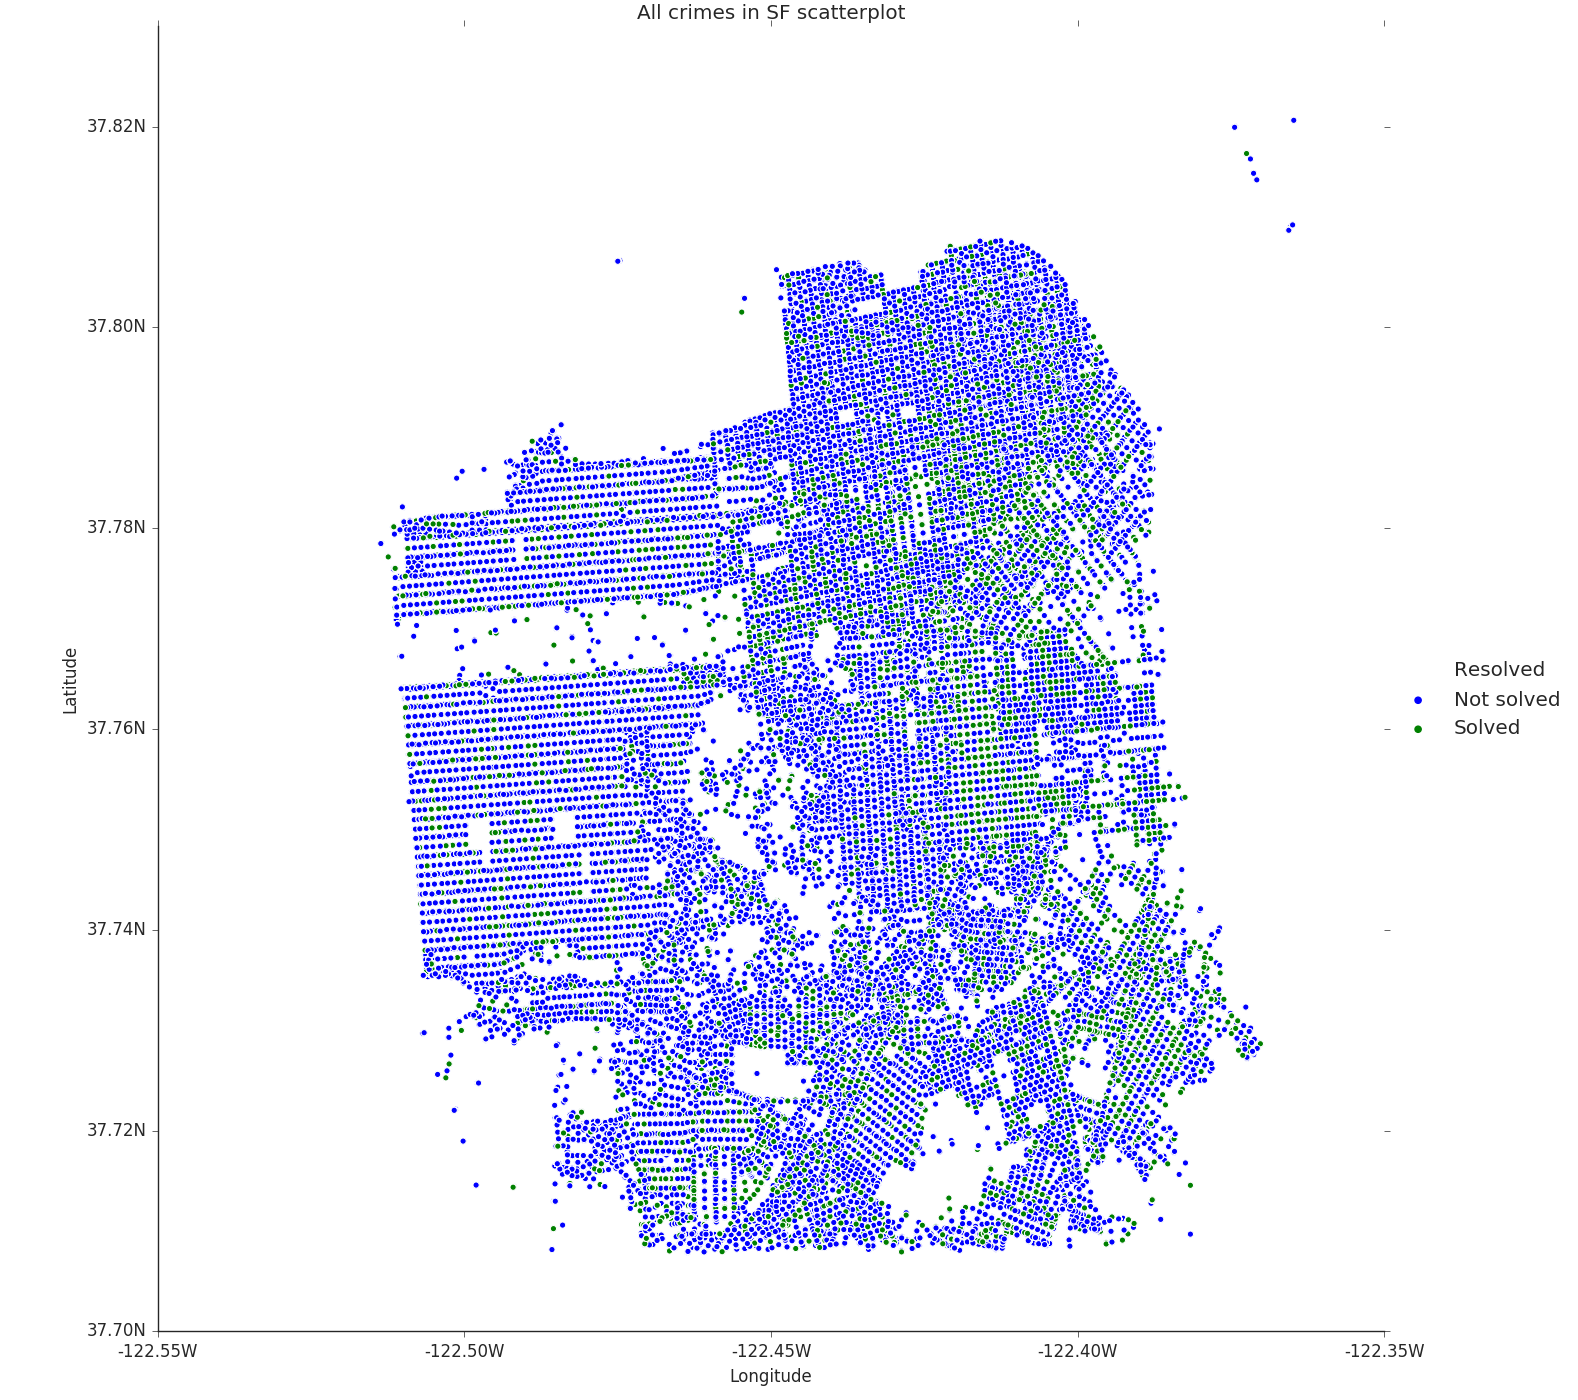

In [40]:
sns.set_style("ticks")
g = sns.relplot(x='X', y='Y', hue = 'Resolved', height=14, data=df_pd)
g.set_xticklabels(['{:3.2f}W'.format(x) for x in np.linspace(-122.55,-122.35,5)])
g.set_yticklabels(['{:2.2f}N'.format(x) for x in np.linspace(37.70,37.82,7)])
plt.xlim(-122.55,-122.35)
plt.ylim(37.70, 37.83)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All crimes in SF scatterplot')
plt.subplots_adjust(left=0.1)

display(plt.show())

##### observation:
> It can be seen from the figure that the problem that has been solved and the unresolved crimes are evenly distributed. Because police may want to focus on the unsolved crimes, it is good to cluster unsolved crimes into clusters so that police can be dispatched to different clusters.

In [42]:
from pyspark.ml.feature import VectorAssembler

df_model = df_model.filter((col('X') > -122.55) & (col('X') < -122.35) & (col('Y') > 37.70) & (col('Y') < 37.83))
vecAssembler = VectorAssembler(inputCols=["X", "Y"], outputCol="features")
new_df = vecAssembler.transform(df_model)

In [43]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=3, tol=0.0001, maxIter=20, seed=1)
model_kmeans = kmeans.fit(new_df.select('features'))

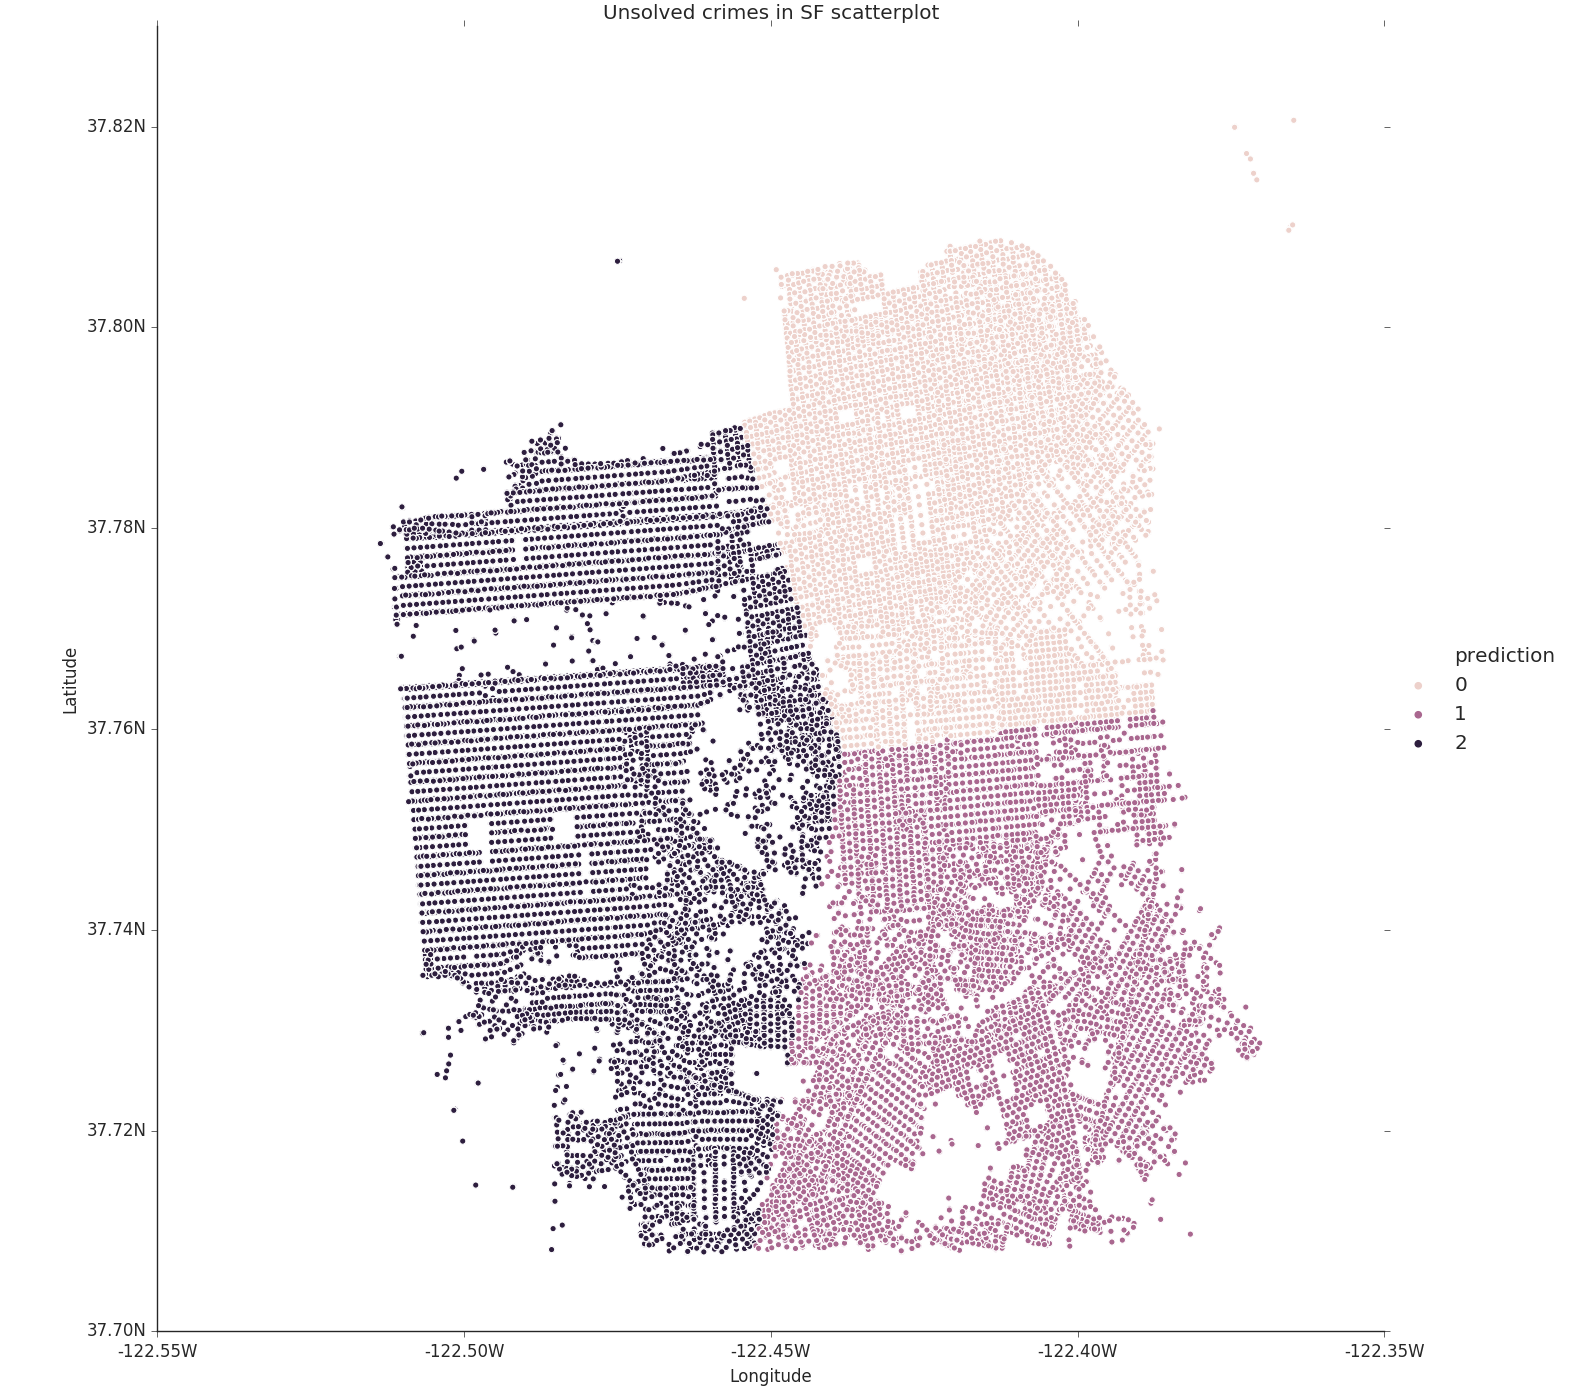

In [44]:
transformed_kmeans = model_kmeans.transform(new_df).select("X", "Y", "prediction")
transformed_kmeans_pd = transformed_kmeans.toPandas()

sns.set_style("ticks")
g2 = sns.relplot(x='X', y='Y', hue = 'prediction', height=14, data=transformed_kmeans_pd)
g2.set_xticklabels(['{:3.2f}W'.format(x) for x in np.linspace(-122.55,-122.35,5)])
g2.set_yticklabels(['{:2.2f}N'.format(x) for x in np.linspace(37.70,37.82,7)])
plt.xlim(-122.55,-122.35)
plt.ylim(37.70, 37.83)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Unsolved crimes in SF scatterplot')
plt.subplots_adjust(left=0.1)

display(plt.show())

In [45]:
centers_kmeans = model_kmeans.clusterCenters()
centers_kmeans

Out[ 21 ]: 
[array([-122.41552577, 37.78287088]),
 array([-122.41151419, 37.73634663]),
 array([-122.47198853, 37.75424885])]

In [46]:
summary_kmeans = model_kmeans.summary
summary_kmeans.clusterSizes

Out[ 13 ]: [854634, 310413, 248182]

##### Observation:
> Apparently, there are more crimes in the first cluster. Even though more police could be distributed to that place, the density of crime in the first cluster may vary at different coordinates. A more flexible model could deal with the variance problem, which is the Gaussian Mixture Model.

In [48]:
from pyspark.ml.clustering import GaussianMixture

gm = GaussianMixture(k=3, tol=0.0001, maxIter=20, seed=1)
model_gmm = gm.fit(new_df.select('features'))

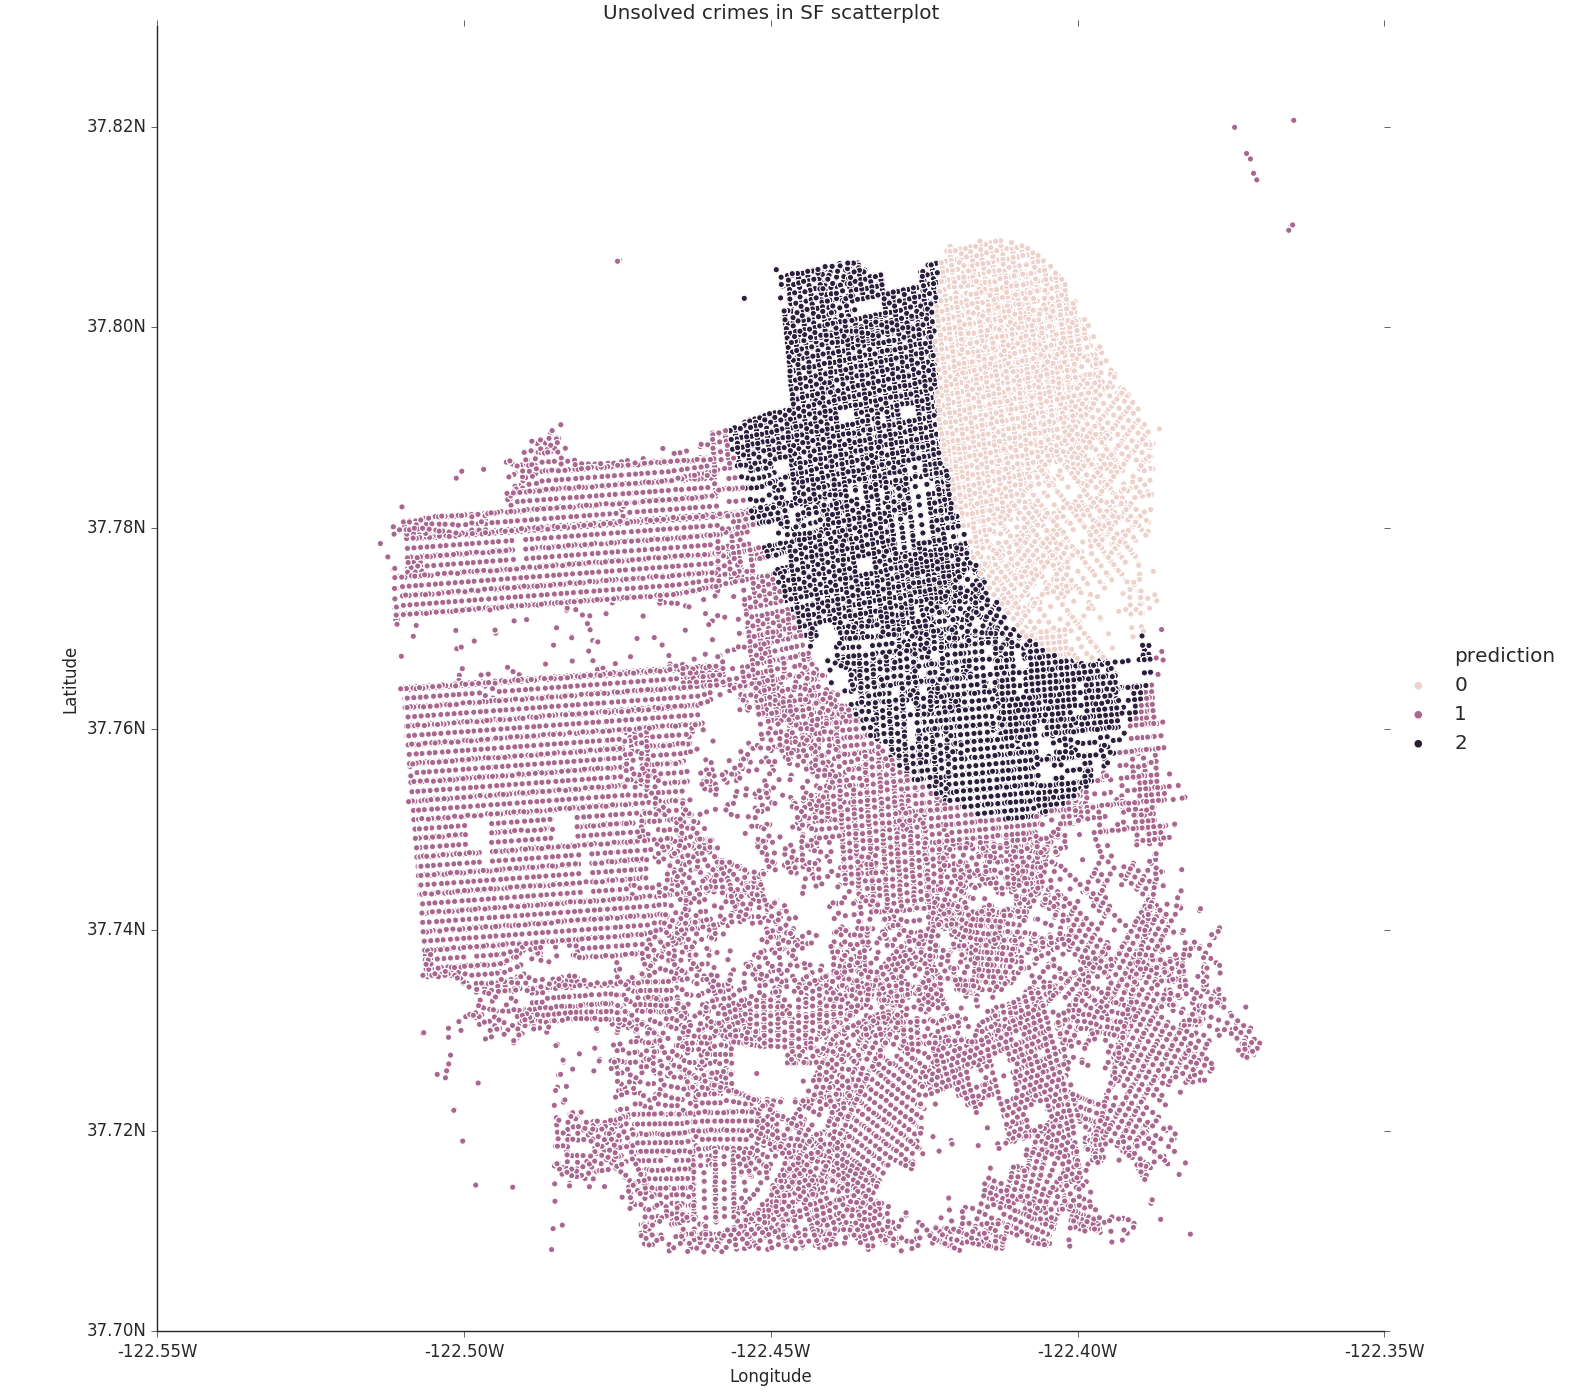

In [49]:
transformed_gmm = model_gmm.transform(new_df).select("X", "Y", "prediction")
transformed_gmm_pd = transformed_gmm.toPandas()

sns.set_style("ticks")
g3 = sns.relplot(x='X', y='Y', hue = 'prediction', height=14, data=transformed_gmm_pd)
g3.set_xticklabels(['{:3.2f}W'.format(x) for x in np.linspace(-122.55,-122.35,5)])
g3.set_yticklabels(['{:2.2f}N'.format(x) for x in np.linspace(37.70,37.82,7)])
plt.xlim(-122.55,-122.35)
plt.ylim(37.70, 37.83)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Unsolved crimes in SF scatterplot')
plt.subplots_adjust(left=0.1)

display(plt.show())

In [50]:
centers_gmm = model_gmm.gaussiansDF.select('mean').collect()
for i in range(len(centers_gmm)):
    print(centers_gmm[i][0])

[-122.408440196,37.7860319593]
[-122.43890254,37.7461643329]
[-122.422856899,37.7761030848]

In [51]:
summary_gmm = model_gmm.summary
summary_gmm.clusterSizes

Out[ 19 ]: [509048, 508725, 395456]

Observation:
> 
* The first cluster has the smallest area but the largest number of crimes. 
* These three clusters overlap with each other, meaning the variance of them are different, the first cluster has the largest density, then the second cluster.
* More police should be distributed at North East SF because of its higher crime density. The exact ratio of the police distribution could refer to the cluster size of Kmeans and GMM.

#### summary
> 
* Preprocessed SF crime data and predefined UDF to get an operable Dataframe and column transformation rules for data analysis.
* Performed OLAP using Dataframe operation and SparkSQL on different dimension to gain insight from data and then give suggestions to visitors and police.
* Applied Kmeans and GMM to the unsolved geographical crime data points to generate different kinds of clusters.
* Visualized the variation of the spatial distribution of different cluster results and then give recommendations to the police.